# Cloud Resource Optimization
# Shruti Anil Chinke
# Roll no. 63

In [ ]:

import numpy as np
import pandas as pd


from numpy.linalg import inv      # linalg = linear algebra, inv = inverse (used to find inverse of a matrix)

import os
from numpy import random
import scipy
from scipy import stats
from scipy.stats import skew, kurtosis
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import t
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import chisquare
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import f

import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

from statsmodels.stats import proportion as ssp
from statsmodels.stats.proportion import  proportions_ztest

from statsmodels.stats import rates
from statsmodels.stats.rates import test_poisson
from statsmodels.stats.rates import test_poisson_2indep


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from statsmodels.miscmodels.ordinal_model import OrderedModel

from statsmodels.discrete.discrete_model import Poisson as psn
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import NegativeBinomial as ngb

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report


from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Step 2: Pick 20% of total rows to become 'completed'
num_completed = int(0.20 * len(df))

# Randomly sample from current running and waiting
eligible_idx = df[df['task_status'].isin(['running', 'waiting'])].sample(n=num_completed, random_state=42).index

# Assign those rows to 'completed'
df.loc[eligible_idx, 'task_status']='completed'

In [ ]:
df['task_status'].unique()

array(['completed', 'running', 'waiting'], dtype=object)

# Load your Data

In [ ]:
df = pd.read_csv("/content/cloud_optimizer.csv")
df.head()

,vm_id,timestamp,cpu_usage,memory_usage,disk_io,network_traffic,power_consumption,num_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status
0,vm_02315,2025-06-29 00:59:11,65.891148,44.970416,79.147536,81.593031,224.998620,8835,234.450881,0.167,io,medium,running
1,vm_00023,2025-06-29 00:15:47,55.985852,74.130633,49.122988,445.004751,229.548031,1007,246.101195,0.018,network,medium,running
2,vm_01349,2025-06-29 00:45:56,34.106867,79.773003,97.197016,344.983795,214.588040,1731,271.497975,0.030,compute,medium,running
3,vm_02412,2025-06-29 00:35:09,34.138826,61.733021,2.815393,222.970408,216.305035,8215,280.613650,0.135,compute,medium,running
4,vm_03907,2025-06-29 01:03:48,53.851100,31.755124,NaN,132.854074,209.353003,5472,249.427367,0.105,io,low,running


# Understand your data

In [ ]:
df.shape

(305000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305000 entries, 0 to 304999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   vm_id              305000 non-null  object 
 1   timestamp          305000 non-null  object 
 2   cpu_usage          301956 non-null  float64
 3   memory_usage       305000 non-null  float64
 4   disk_io            289732 non-null  float64
 5   network_traffic    305000 non-null  float64
 6   power_consumption  305000 non-null  float64
 7   num_instructions   305000 non-null  int64  
 8   execution_time     305000 non-null  float64
 9   energy_efficiency  305000 non-null  float64
 10  task_type          298901 non-null  object 
 11  task_priority      301950 non-null  object 
 12  task_status        305000 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 30.3+ MB


In [ ]:
df.describe()

,cpu_usage,memory_usage,disk_io,network_traffic,power_consumption,num_instructions,execution_time,energy_efficiency
count,301956.000000,305000.000000,289732.000000,305000.000000,305000.000000,305000.000000,305000.000000,305000.000000
mean,50.000238,59.407750,51.213573,201.472623,219.670808,5504.285472,253.285540,0.101493
std,19.775195,23.657273,27.915311,96.712589,22.152806,2597.623394,61.598627,0.048798
min,0.000000,0.000000,0.000172,0.003265,125.573340,1000.000000,164.797546,0.015000
25%,36.520941,42.968264,30.117811,132.195466,204.622887,3256.000000,234.996284,0.060000
50%,49.999218,59.934667,50.040677,199.915352,219.778278,5506.000000,250.137478,0.101000
75%,63.478906,76.817871,70.289777,267.263896,234.855152,7754.000000,265.239437,0.142000
max,100.000000,100.000000,185.803517,661.638392,312.068534,9999.000000,1615.083743,0.259000


In [ ]:
df.dtypes

,0
vm_id,object
timestamp,object
cpu_usage,float64
memory_usage,float64
disk_io,float64
network_traffic,float64
power_consumption,float64
num_instructions,int64
execution_time,float64
energy_efficiency,float64


# Data Cleaning - Handle missing values¶

In [ ]:
df.isnull().sum()

,0
vm_id,0
timestamp,0
cpu_usage,3044
memory_usage,0
disk_io,15268
network_traffic,0
power_consumption,0
num_instructions,0
execution_time,0
energy_efficiency,0


In [ ]:
# dropping the vm_id and timestamp columns

df = df.drop(['vm_id', 'timestamp'], axis = 1)

In [ ]:
df.head()

,cpu_usage,memory_usage,disk_io,network_traffic,power_consumption,num_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status
0,65.891148,44.970416,79.147536,81.593031,224.998620,8835,234.450881,0.167,io,medium,running
1,55.985852,74.130633,49.122988,445.004751,229.548031,1007,246.101195,0.018,network,medium,running
2,34.106867,79.773003,97.197016,344.983795,214.588040,1731,271.497975,0.030,compute,medium,running
3,34.138826,61.733021,2.815393,222.970408,216.305035,8215,280.613650,0.135,compute,medium,running
4,53.851100,31.755124,NaN,132.854074,209.353003,5472,249.427367,0.105,io,low,running


In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

print(cat_cols)
print(num_cols)

['task_type', 'task_priority', 'task_status']
['cpu_usage', 'memory_usage', 'disk_io', 'network_traffic', 'power_consumption', 'num_instructions', 'execution_time', 'energy_efficiency']


In [ ]:
medians = []
for col in num_cols:
    medians.append(df[col].median())

print(medians)


[49.99921829638764, 59.93466691058711, 50.04067743948835, 199.9153516898339, 219.77827830571704, 5506.0, 250.1374777282, 0.101]


In [ ]:
for i, col in enumerate(num_cols):
    df[col] = df[col].fillna(medians[i])

In [ ]:
modes = []
for col in cat_cols:
    modes.append(df[col].mode().iloc[0])

print(modes)

['compute', 'medium', 'running']


In [ ]:
for i, col in enumerate(cat_cols):
    df[col] = df[col].fillna(modes[i])

In [ ]:
df.isnull().sum()

,0
cpu_usage,0
memory_usage,0
disk_io,0
network_traffic,0
power_consumption,0
num_instructions,0
execution_time,0
energy_efficiency,0
task_type,0
task_priority,0


In [ ]:
# Find duplicate rows in the dataset
duplicates = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicates)

# Count the number of duplicate rows
print(f"\nTotal number of duplicate rows: {duplicates.shape[0]}")

Duplicate Rows:
        cpu_usage  memory_usage     disk_io  network_traffic  \
2797    49.198135     42.446497   50.129597       271.346383   
3334    53.491766     33.275080  100.544058        96.020276   
6058    79.674753     64.814026   22.976370       186.331365   
8264    47.594643     77.851232   21.313074       214.310158   
11840   50.549114     65.429928   18.780063       272.723818   
...           ...           ...         ...              ...   
304818  64.546665    100.000000   37.019807        45.337086   
304829  69.568606     63.258625   61.899456        72.584623   
304954  38.074636     36.640069   77.637081        21.853592   
304964  82.938370     71.528241   39.284958       244.065694   
304965  51.810759     63.355813   78.522567        72.106722   

        power_consumption  num_instructions  execution_time  \
2797           224.575653              8533      247.757424   
3334           212.078944              1799      229.836057   
6058           249.211589 

In [ ]:
# Remove duplicates and keep the first occurrence
df = df.drop_duplicates()

# Check the new shape
print(f"New dataset shape: {df.shape}")

New dataset shape: (300030, 11)


# Handle Outliers

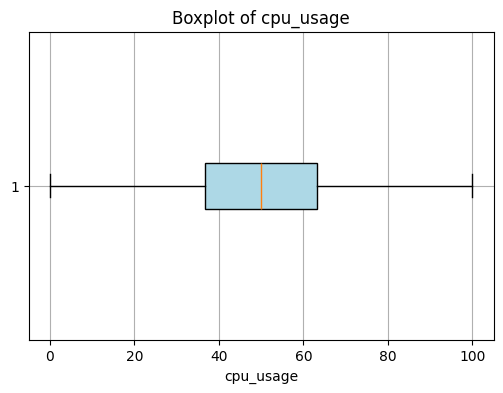

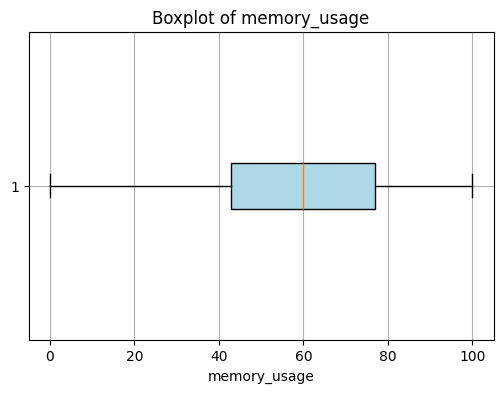

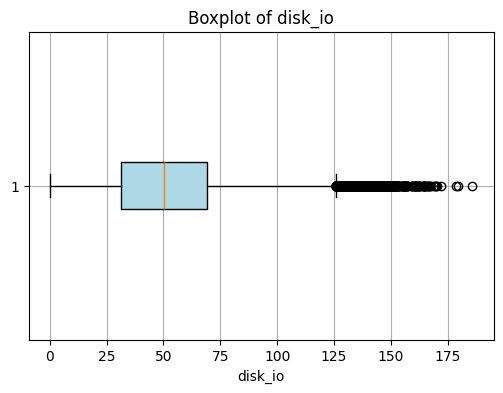

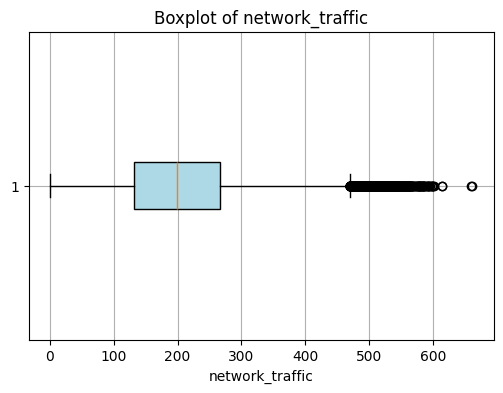

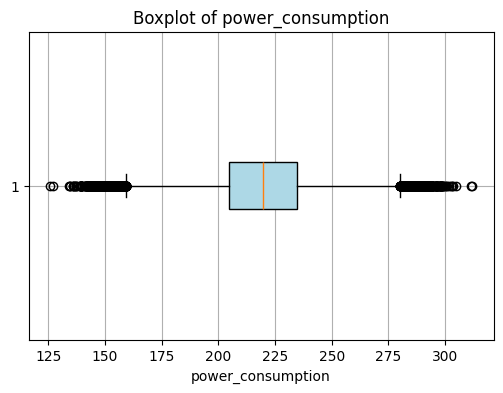

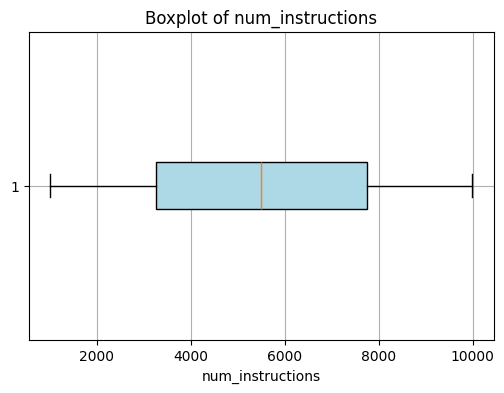

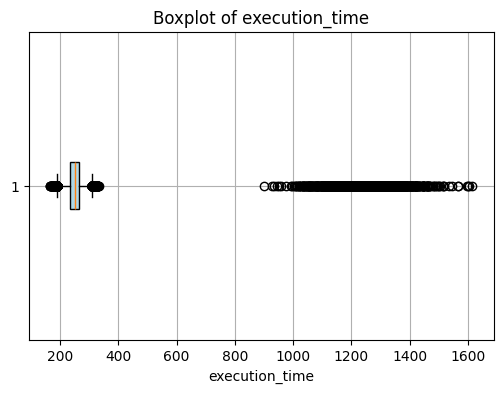

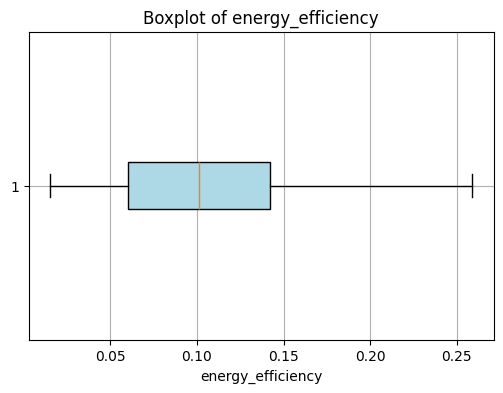

In [ ]:
# Create boxplots for each numerical column

for col in num_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

In [ ]:
import numpy as np
import pandas as pd

def bounds(col):
    q1 = np.percentile(col, 25)
    q3 = np.percentile(col, 75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr

    # Find outlier indices
    t1 = np.where(col >= ub)
    t2 = np.where(col <= lb)

    # Calculate replacement values (you can choose mean, median, etc.)
    uw = col[col <= ub].max()  # Max value within upper bound
    lw = col[col >= lb].min()  # Min value within lower bound

    # Replace outliers
    col.iloc[t1] = uw
    col.iloc[t2] = lw

    return col

# Apply the function
for col in num_cols:
    df[col] = bounds(df[col])

/tmp/ipython-input-84-2754843736.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col.iloc[t2] = lw
/tmp/ipython-input-84-2754843736.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col.iloc[t1] = uw
/tmp/ipython-input-84-2754843736.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col.iloc[t2] = lw
/tmp/ipython-input-84-2754843736.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

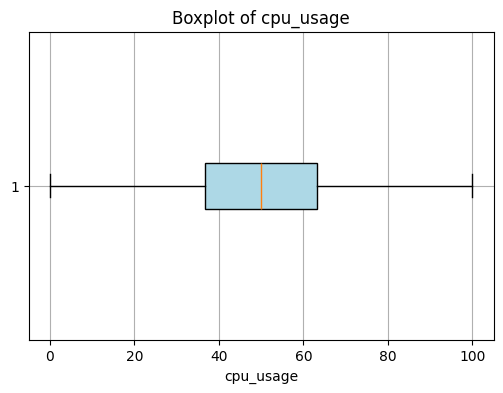

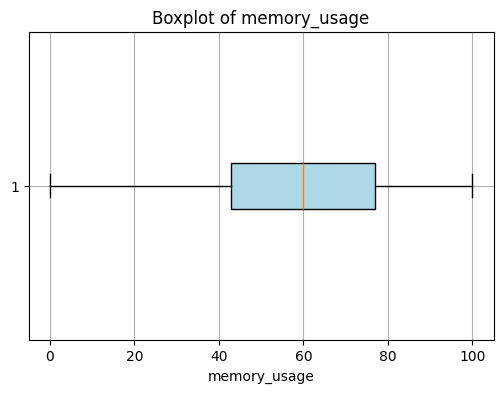

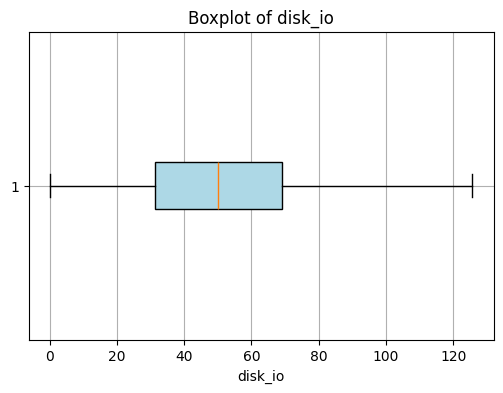

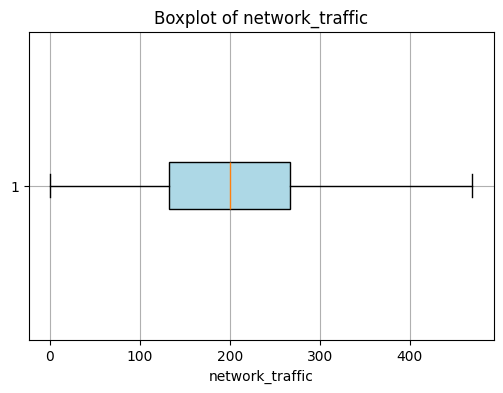

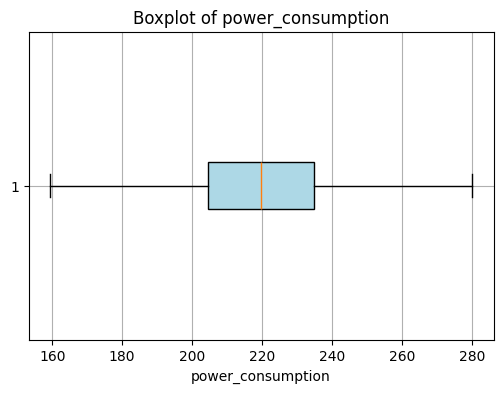

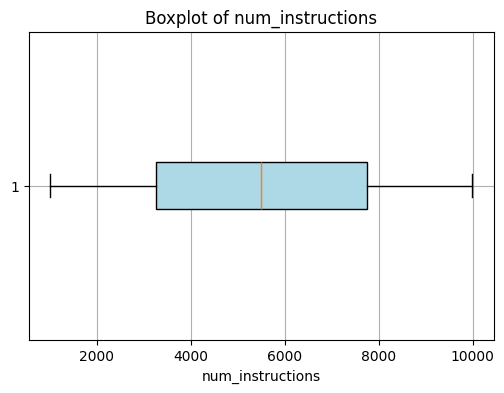

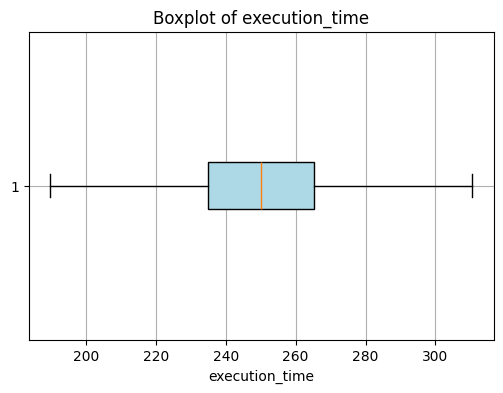

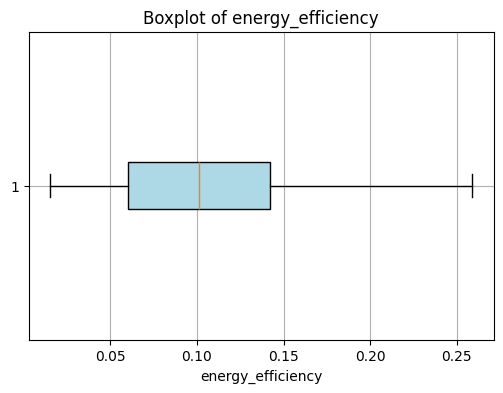

In [ ]:
# Create boxplots for each numerical column

for col in num_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

# Correlation Matrix

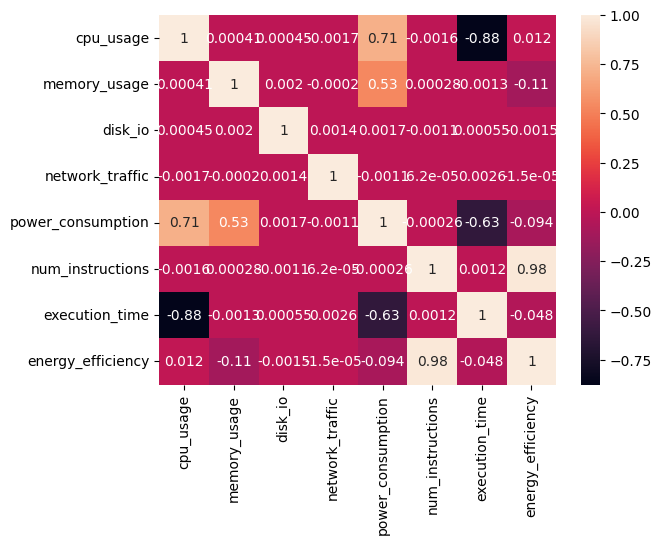

In [ ]:
sns.heatmap(df[num_cols].corr(), annot = True)
plt.show()

# Univariate Analysis

In [ ]:
def histogram(x,y=30):
  plt.figure(figsize=(10, 5))
  sns.histplot(df[x], bins=y, kde=True, color='skyblue')
  plt.title('Title')
  plt.xlabel(x)
  plt.ylabel('Frequency / Density')
  plt.show()

In [ ]:
def bar_plot(column):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, palette='Set2')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300030 entries, 0 to 304999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cpu_usage          300030 non-null  float64
 1   memory_usage       300030 non-null  float64
 2   disk_io            300030 non-null  float64
 3   network_traffic    300030 non-null  float64
 4   power_consumption  300030 non-null  float64
 5   num_instructions   300030 non-null  int64  
 6   execution_time     300030 non-null  float64
 7   energy_efficiency  300030 non-null  float64
 8   task_type          300030 non-null  object 
 9   task_priority      300030 non-null  object 
 10  task_status        300030 non-null  object 
dtypes: float64(7), int64(1), object(3)
memory usage: 35.5+ MB


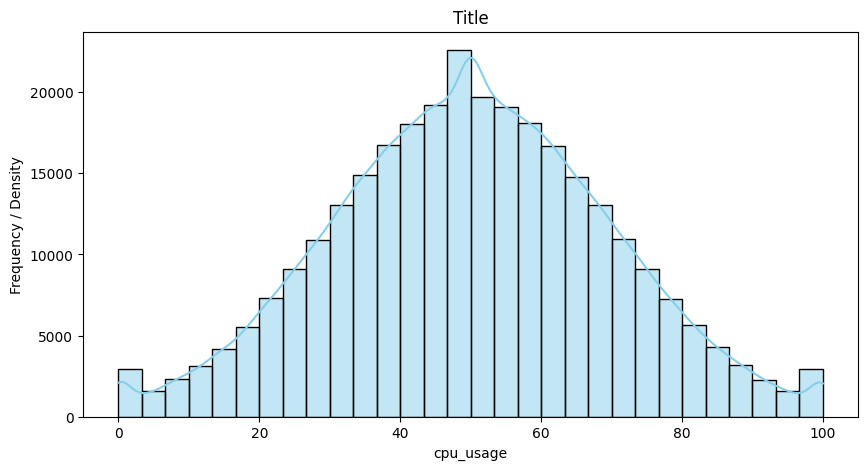

In [ ]:
histogram('cpu_usage')

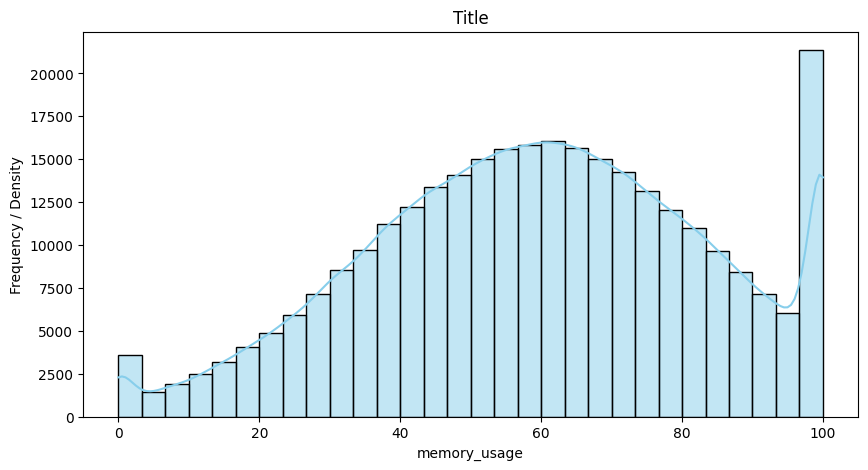

In [ ]:
histogram('memory_usage')

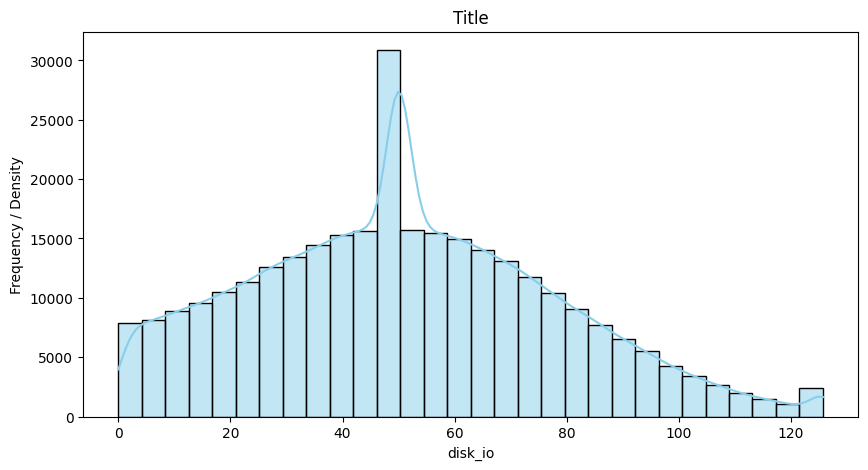

In [ ]:
histogram('disk_io')

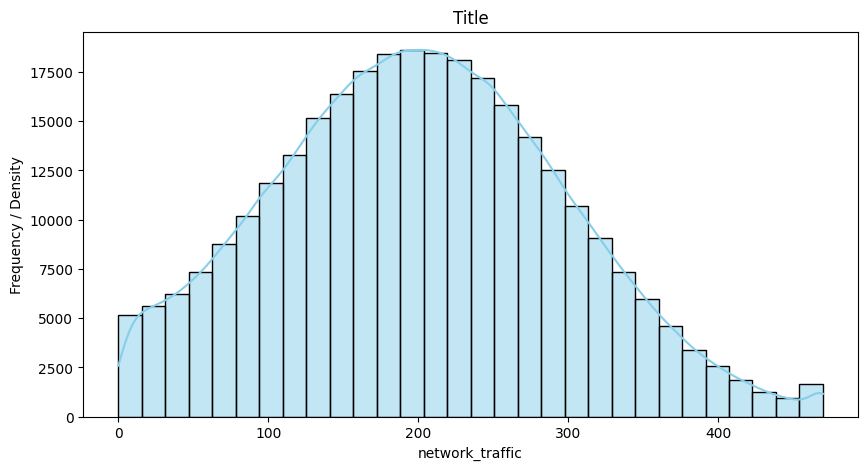

In [ ]:
histogram('network_traffic')

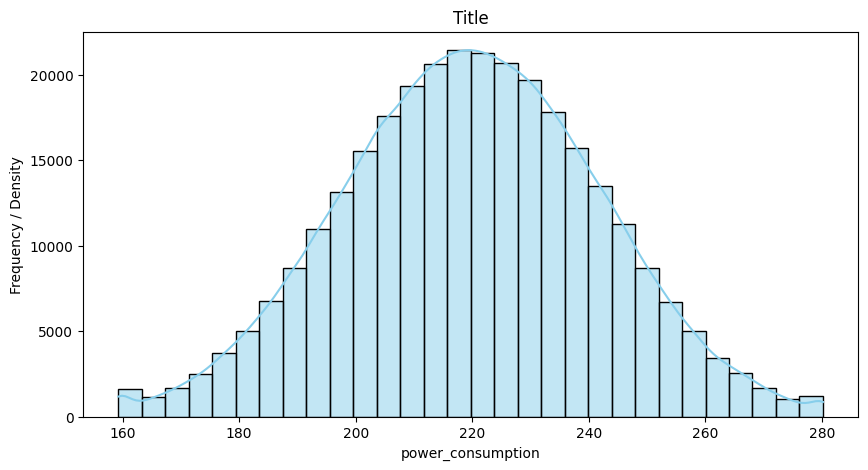

In [ ]:
histogram('power_consumption')

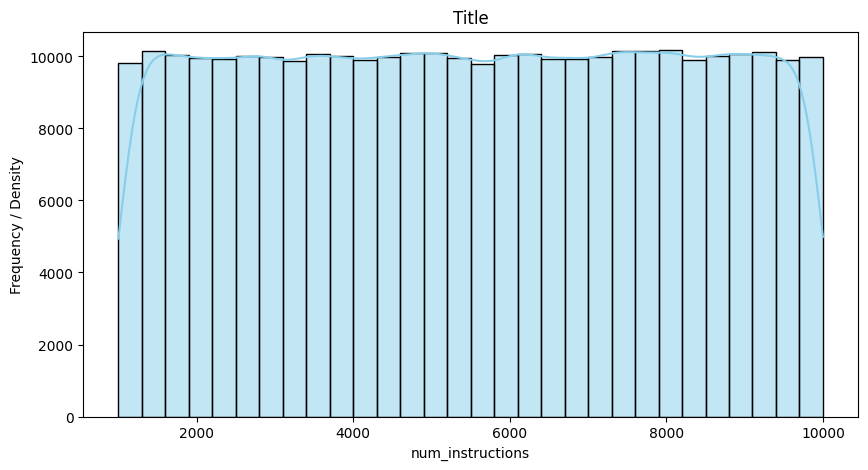

In [ ]:
histogram('num_instructions')

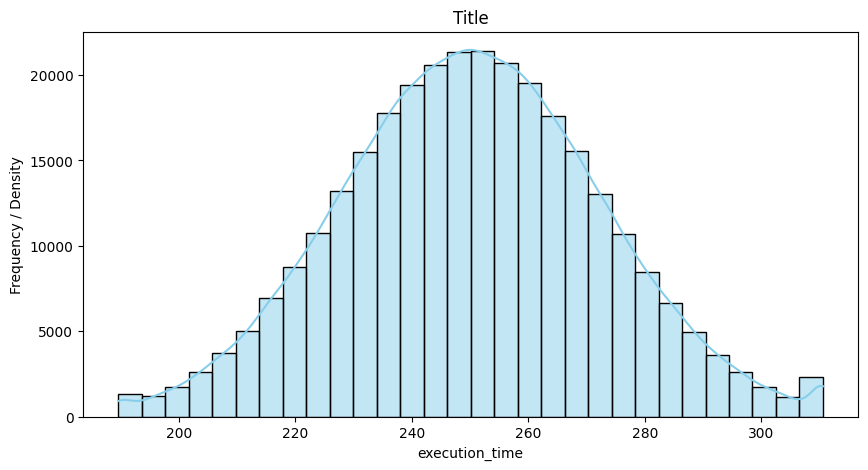

In [ ]:
histogram('execution_time')

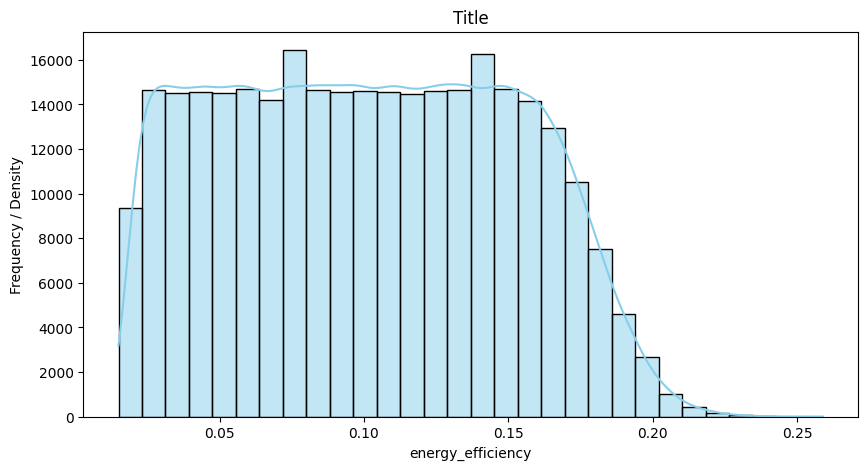

In [ ]:
histogram('energy_efficiency')

/tmp/ipython-input-88-3961766685.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


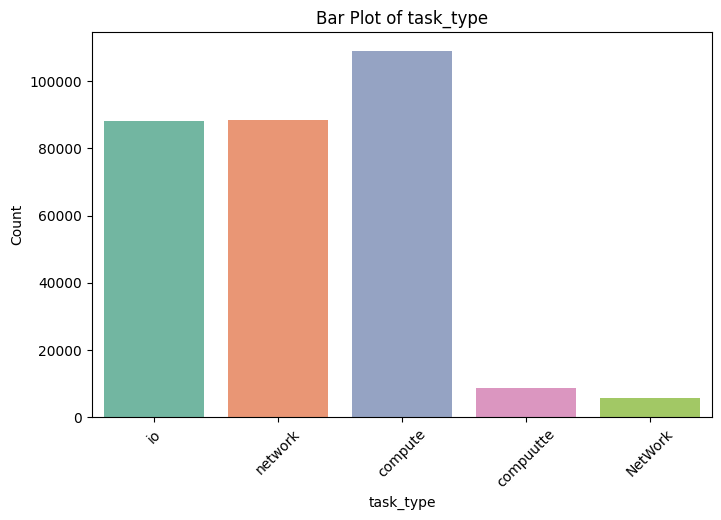

In [ ]:
bar_plot('task_type')

/tmp/ipython-input-88-3961766685.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


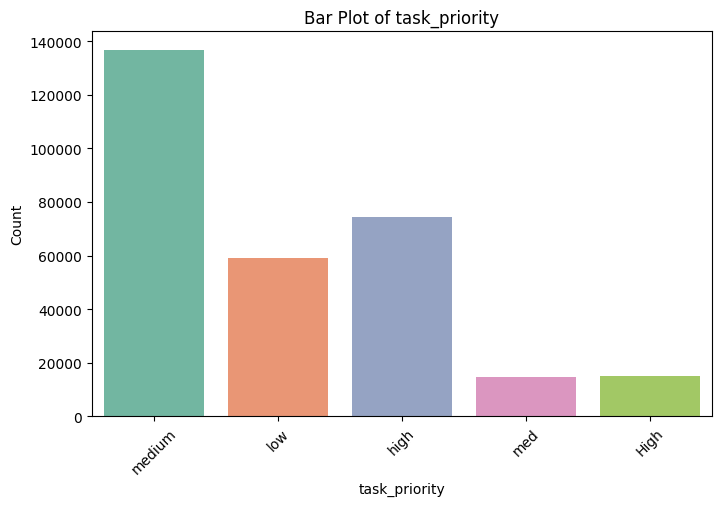

In [ ]:
bar_plot('task_priority')

/tmp/ipython-input-88-3961766685.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


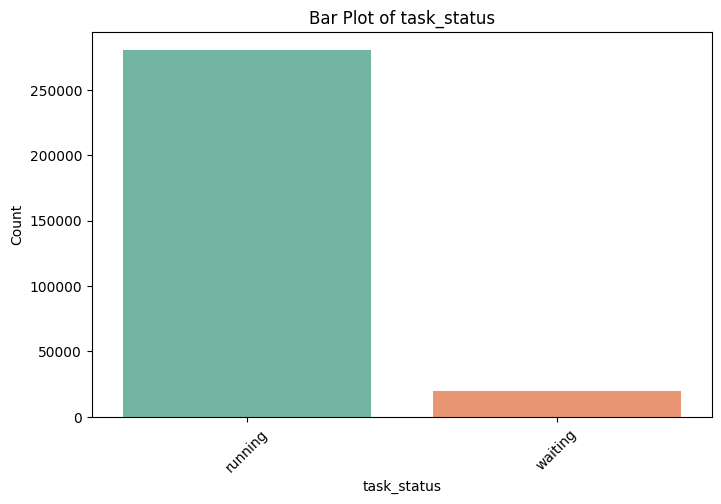

In [ ]:
bar_plot('task_status')

# Bivariate analysis

In [ ]:
def plot_boxplot(df, categorical_col, continuous_col):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=categorical_col, y=continuous_col, data=df, palette='pastel')
    plt.title(f"{continuous_col} by {categorical_col} (Boxplot)", fontsize=12)
    plt.xlabel(categorical_col, fontsize=10)
    plt.ylabel(continuous_col, fontsize=10)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-101-3363419047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_col, y=continuous_col, data=df, palette='pastel')


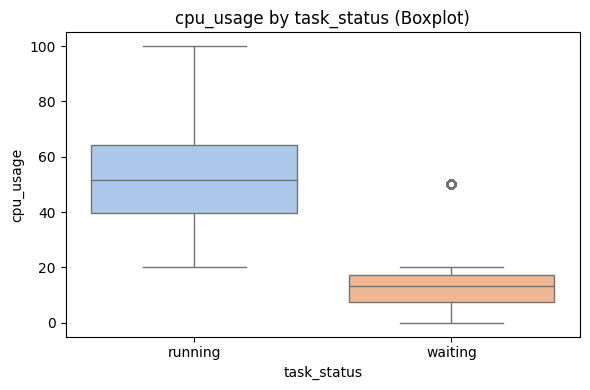

In [ ]:
plot_boxplot(df, categorical_col='task_status', continuous_col='cpu_usage')

/tmp/ipython-input-101-3363419047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_col, y=continuous_col, data=df, palette='pastel')


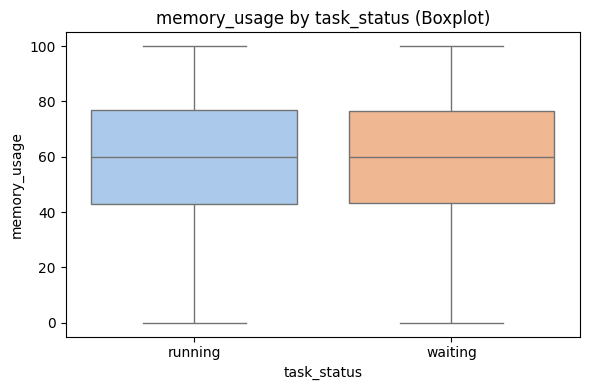

In [ ]:
plot_boxplot(df, categorical_col='task_status', continuous_col='memory_usage')

/tmp/ipython-input-101-3363419047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_col, y=continuous_col, data=df, palette='pastel')


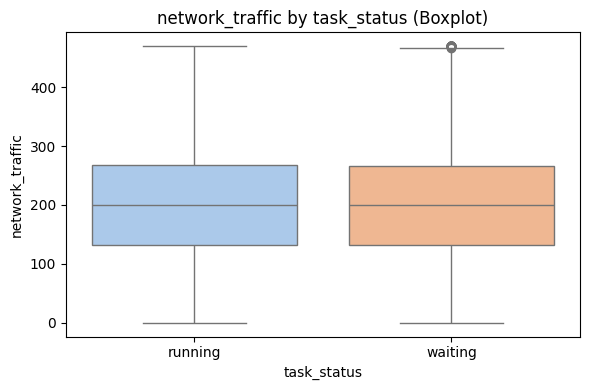

In [ ]:
plot_boxplot(df, categorical_col='task_status', continuous_col='network_traffic')

/tmp/ipython-input-101-3363419047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_col, y=continuous_col, data=df, palette='pastel')


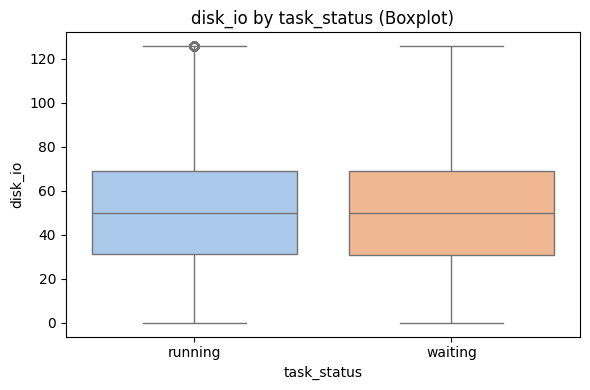

In [ ]:
plot_boxplot(df, categorical_col='task_status', continuous_col='disk_io')

/tmp/ipython-input-101-3363419047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_col, y=continuous_col, data=df, palette='pastel')


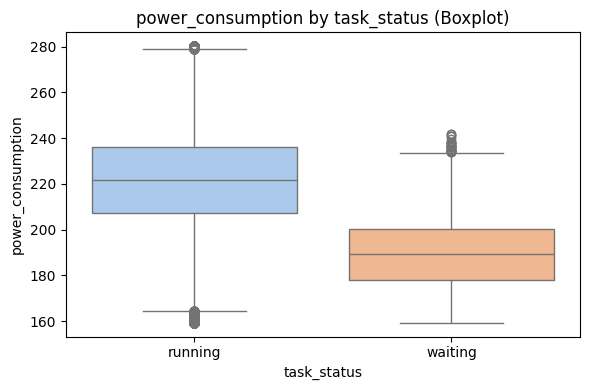

In [ ]:
plot_boxplot(df, categorical_col='task_status', continuous_col='power_consumption')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300030 entries, 0 to 304999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cpu_usage          300030 non-null  float64
 1   memory_usage       300030 non-null  float64
 2   disk_io            300030 non-null  float64
 3   network_traffic    300030 non-null  float64
 4   power_consumption  300030 non-null  float64
 5   num_instructions   300030 non-null  int64  
 6   execution_time     300030 non-null  float64
 7   energy_efficiency  300030 non-null  float64
 8   task_type          300030 non-null  object 
 9   task_priority      300030 non-null  object 
 10  task_status        300030 non-null  object 
dtypes: float64(7), int64(1), object(3)
memory usage: 35.5+ MB


/tmp/ipython-input-101-3363419047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_col, y=continuous_col, data=df, palette='pastel')


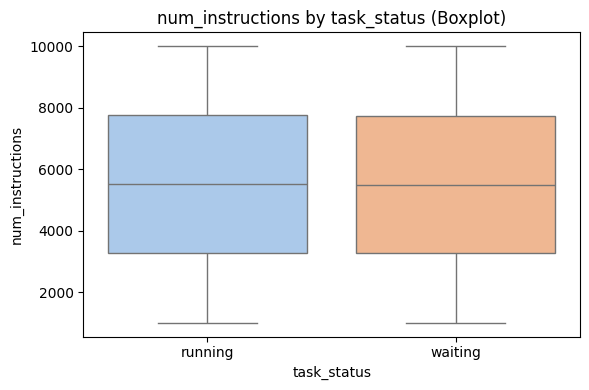

In [ ]:
plot_boxplot(df, categorical_col='task_status', continuous_col='num_instructions')

/tmp/ipython-input-101-3363419047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_col, y=continuous_col, data=df, palette='pastel')


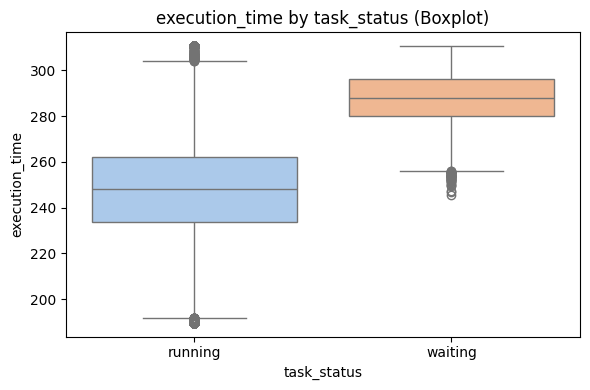

In [ ]:
plot_boxplot(df, categorical_col='task_status', continuous_col='execution_time')

/tmp/ipython-input-101-3363419047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_col, y=continuous_col, data=df, palette='pastel')


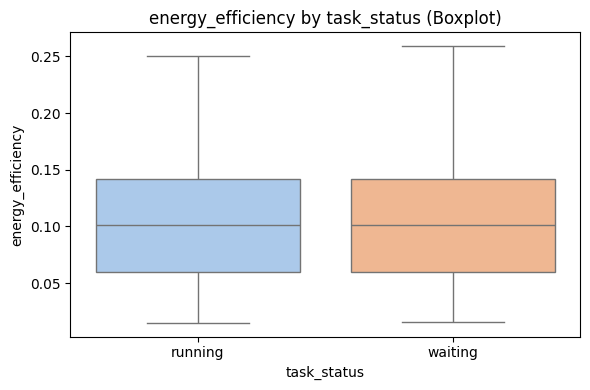

In [ ]:
plot_boxplot(df, categorical_col='task_status', continuous_col='energy_efficiency')

In [ ]:
def plot_categorical_vs_categorical(df, x_col, hue_col):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=x_col, hue=hue_col, data=df, palette='Set2')
    plt.title(f'{x_col} vs {hue_col} (Grouped Bar Chart)', fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel('Count', fontsize=11)
    plt.legend(title=hue_col)
    plt.tight_layout()
    plt.show()

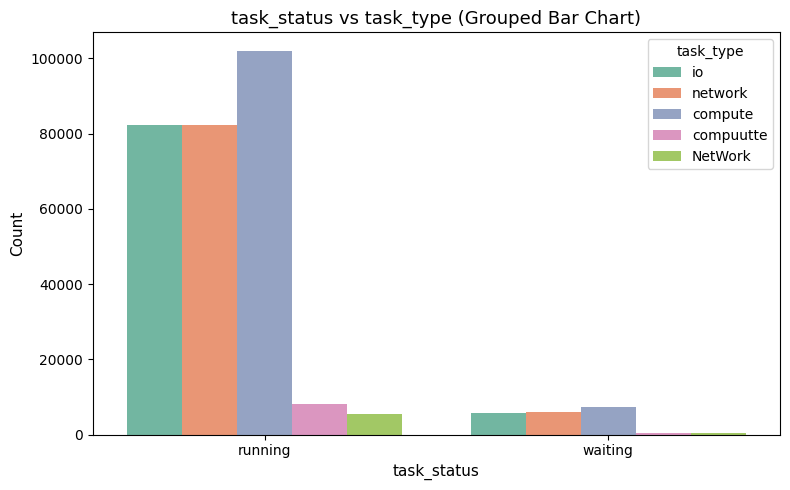

In [ ]:
plot_categorical_vs_categorical(df, x_col='task_status', hue_col='task_type')

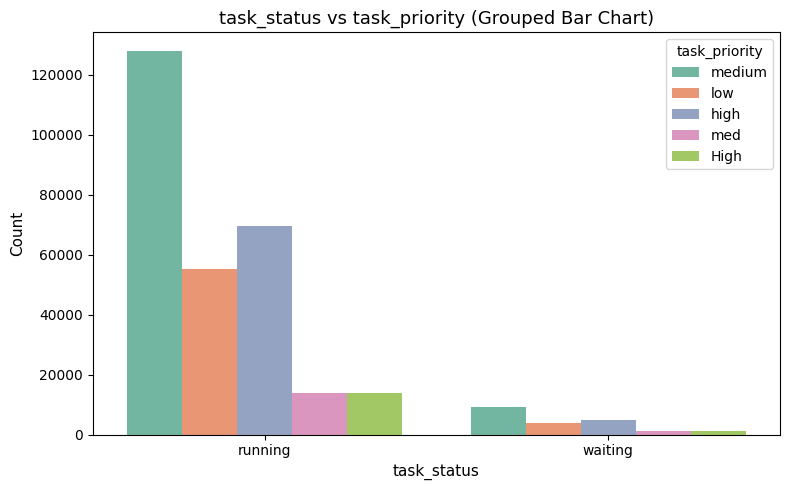

In [ ]:
plot_categorical_vs_categorical(df, x_col='task_status', hue_col='task_priority')

# Multivariate analysis

<Axes: >

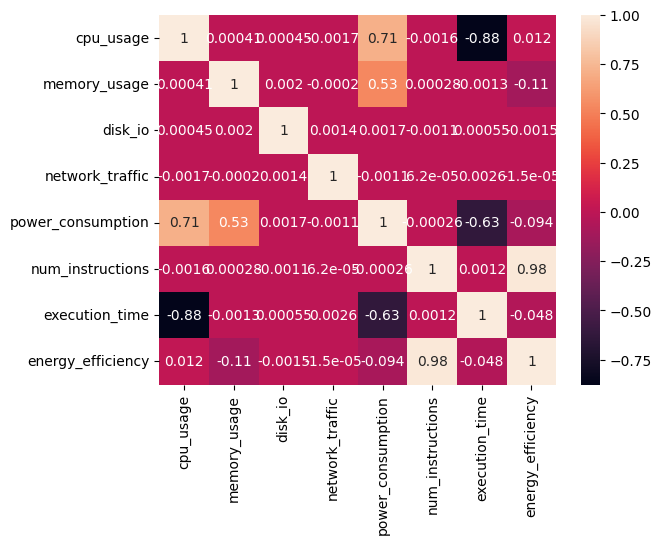

In [ ]:
sns.heatmap(df.drop(['task_type', 'task_priority', 'task_status'], axis=1).corr(), annot=True)

# Feature selection

# 1. VIF technique

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numerical features
numerical_cols = [
    'cpu_usage',
    'memory_usage',
    'network_traffic',
    'power_consumption',
    'num_instructions',
    'execution_time',
    'energy_efficiency',
    'disk_io'
]

X = df[numerical_cols]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF values for each feature:")
print(vif_data)

VIF values for each feature:
             Feature         VIF
0          cpu_usage   48.039455
1       memory_usage   16.653627
2    network_traffic    5.361459
3  power_consumption  395.088786
4   num_instructions  237.472176
5     execution_time  143.910749
6  energy_efficiency  229.903282
7            disk_io    4.563009


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300030 entries, 0 to 304999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cpu_usage          300030 non-null  float64
 1   memory_usage       300030 non-null  float64
 2   disk_io            300030 non-null  float64
 3   network_traffic    300030 non-null  float64
 4   power_consumption  300030 non-null  float64
 5   num_instructions   300030 non-null  int64  
 6   execution_time     300030 non-null  float64
 7   energy_efficiency  300030 non-null  float64
 8   task_type          300030 non-null  object 
 9   task_priority      300030 non-null  object 
 10  task_status        300030 non-null  object 
dtypes: float64(7), int64(1), object(3)
memory usage: 35.5+ MB


# 2. Inferential Statistics


=== One-Way ANOVA Results ===

cpu_usage vs task_status
F-statistic: 107094.4595, p-value: 0.0000
Significant difference found.



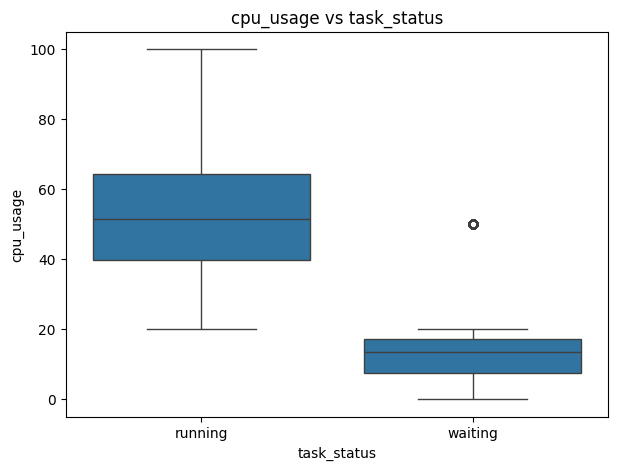

memory_usage vs task_status
F-statistic: 0.1065, p-value: 0.7442
No significant difference.



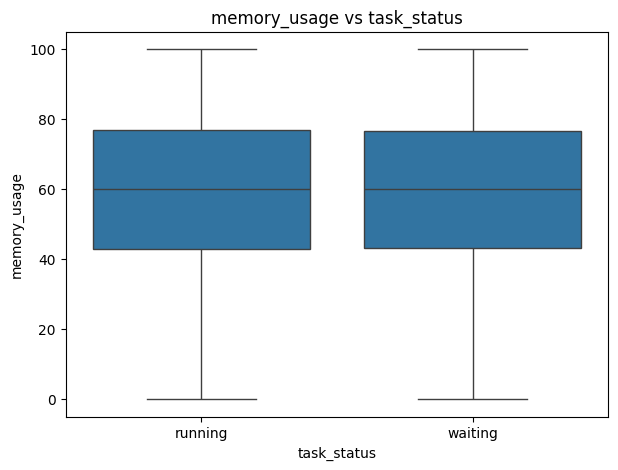

network_traffic vs task_status
F-statistic: 0.7382, p-value: 0.3903
No significant difference.



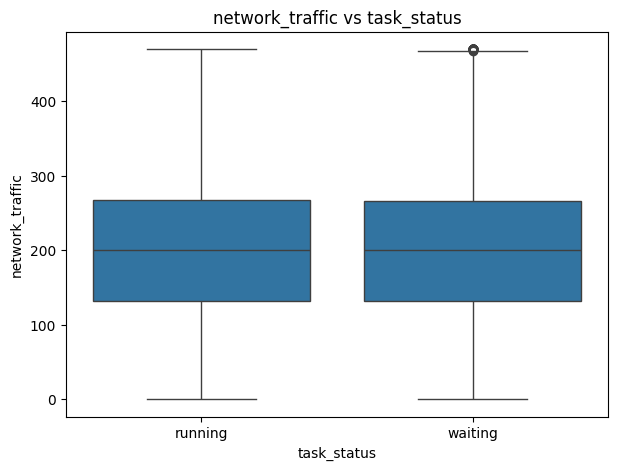

power_consumption vs task_status
F-statistic: 47000.8956, p-value: 0.0000
Significant difference found.



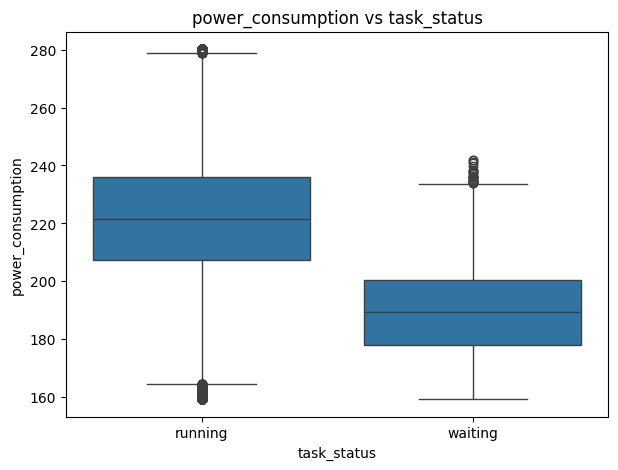

num_instructions vs task_status
F-statistic: 0.0599, p-value: 0.8066
No significant difference.



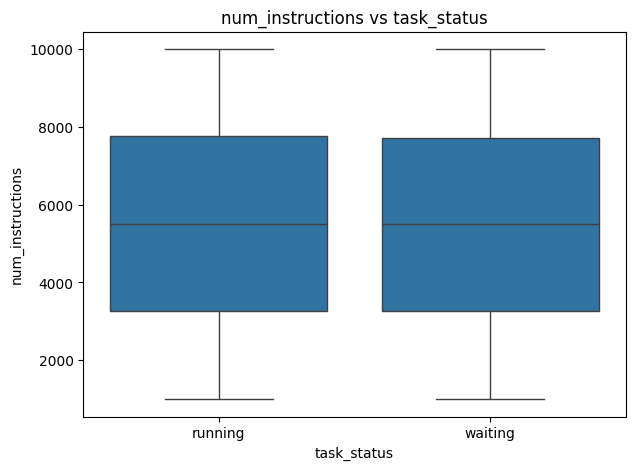

execution_time vs task_status
F-statistic: 78013.4189, p-value: 0.0000
Significant difference found.



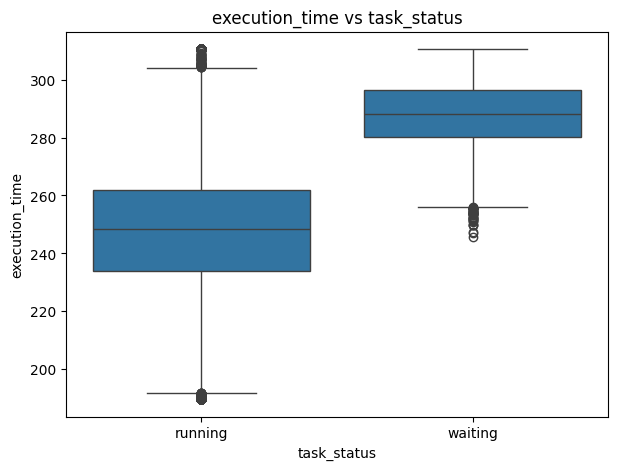

energy_efficiency vs task_status
F-statistic: 0.6446, p-value: 0.4221
No significant difference.



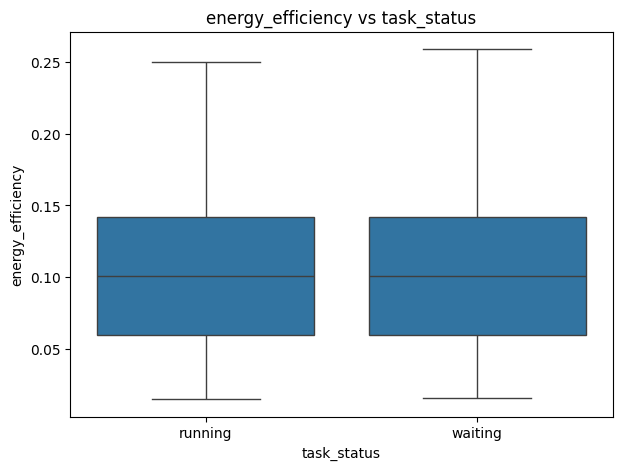

disk_io vs task_status
F-statistic: 2.4075, p-value: 0.1208
No significant difference.



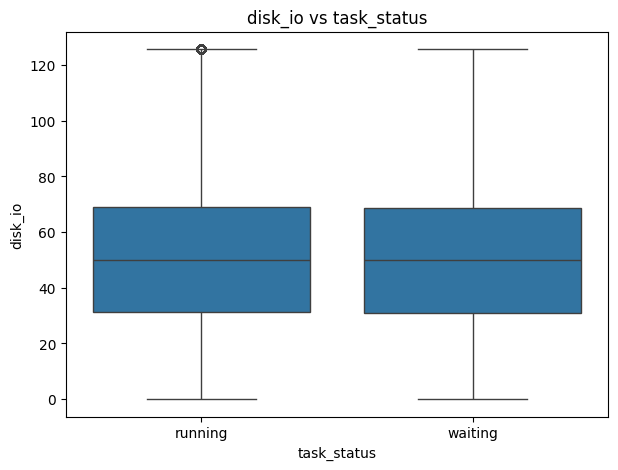

In [ ]:
import pandas as pd
from scipy.stats import f_oneway, chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

continuous_cols = ['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption',
                   'num_instructions', 'execution_time', 'energy_efficiency','disk_io']

categorical_cols = ['task_priority', 'task_type']

target_col = 'task_status'

print("\n=== One-Way ANOVA Results ===\n")

for col in continuous_cols:
    groups = [df[df[target_col] == status][col] for status in df[target_col].unique()]
    f_stat, p_value = f_oneway(*groups)

    print(f'{col} vs {target_col}')
    print(f'F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}')

    if p_value < 0.05:
        print('Significant difference found.\n')
    else:
        print('No significant difference.\n')

    # Optional: Plot boxplot
    plt.figure(figsize=(7, 5))
    sns.boxplot(x=target_col, y=col, data=df)
    plt.title(f'{col} vs {target_col}')
    plt.show()



=== Chi-Square Test Results ===

task_priority vs task_status
Chi-Square Statistic: 5.3384, p-value: 0.2543
No significant association.



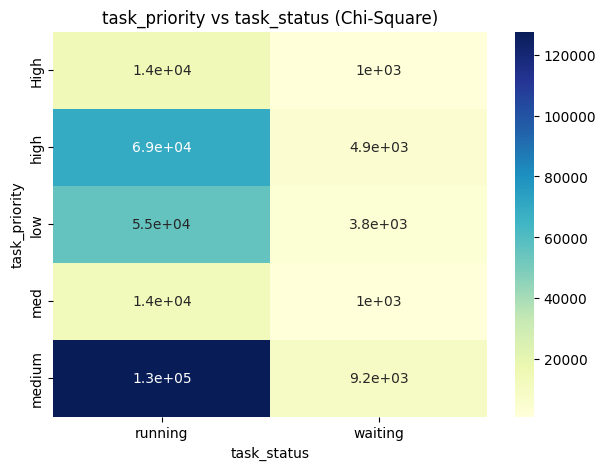

task_type vs task_status
Chi-Square Statistic: 7.6280, p-value: 0.1062
No significant association.



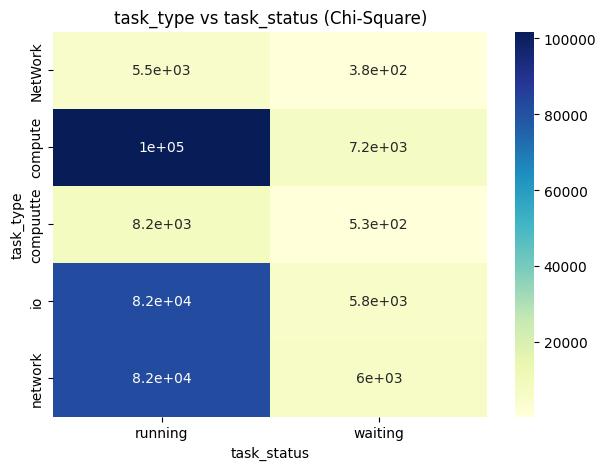

In [ ]:
print("\n=== Chi-Square Test Results ===\n")

for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df[target_col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f'{col} vs {target_col}')
    print(f'Chi-Square Statistic: {chi2:.4f}, p-value: {p:.4f}')

    if p < 0.05:
        print('Significant association found.\n')
    else:
        print('No significant association.\n')

    # Optional: Plot heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
    plt.title(f'{col} vs {target_col} (Chi-Square)')
    plt.ylabel(col)
    plt.xlabel(target_col)
    plt.show()

# Encode categorical variables

In [ ]:
task_type_dummy = pd.get_dummies(df.task_type, drop_first=True, prefix='Type').astype(int)
df.drop('task_type',axis=1,inplace=True)

task_priority_dummy = pd.get_dummies(df.task_priority, drop_first=True, prefix='Priority').astype(int)
df.drop('task_priority', axis =1,inplace=True)

In [ ]:
df = pd.concat([df,task_type_dummy,task_priority_dummy],axis=1)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Define the order explicitly
encoder = OrdinalEncoder(categories=[['completed', 'running', 'waiting']])
df['task_status'] = encoder.fit_transform(df[['task_status']]).astype(int) + 1  # +1 to make completed=1, as it starts with zero

In [ ]:
df.head()

,cpu_usage,memory_usage,disk_io,network_traffic,power_consumption,num_instructions,execution_time,energy_efficiency,task_status,cpu_power_interaction,...,power_time_ratio,cpu_power_ratio,Type_compute,Type_compuutte,Type_io,Type_network,Priority_high,Priority_low,Priority_med,Priority_medium
0,65.891148,44.970416,79.147536,81.593031,224.998620,8835,234.450881,0.167,2,14825.417372,...,0.959683,0.292851,0,0,1,0,0,0,0,1
1,55.985852,74.130633,49.122988,445.004751,229.548031,1007,246.101195,0.018,2,12851.441975,...,0.932738,0.243896,0,0,0,1,0,0,0,1
2,34.106867,79.773003,97.197016,344.983795,214.588040,1731,271.497975,0.030,2,7318.925781,...,0.790385,0.158941,1,0,0,0,0,0,0,1
3,34.138826,61.733021,2.815393,222.970408,216.305035,8215,280.613650,0.135,2,7384.399854,...,0.770829,0.157827,1,0,0,0,0,0,0,1
4,53.851100,31.755124,50.040677,132.854074,209.353003,5472,249.427367,0.105,2,11273.889472,...,0.839335,0.257226,0,0,1,0,0,1,0,0


# Predictive Statistics

# 1. Ordinal Logistic Regression Model

In [ ]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

x_train, x_test, y_train, y_test = train_test_split(df.drop('task_status',axis=1), df.task_status, test_size=0.2, random_state=20)
mod1 = OrderedModel(y_train,x_train,distr='logit').fit(method='bfgs')

print(mod1.summary())

Optimization terminated successfully.
         Current function value: 0.675327
         Iterations: 72
         Function evaluations: 82
         Gradient evaluations: 82
                             OrderedModel Results                             
Dep. Variable:            task_status   Log-Likelihood:            -1.6478e+05
Model:                   OrderedModel   AIC:                         3.296e+05
Method:            Maximum Likelihood   BIC:                         3.297e+05
Date:                Sun, 29 Jun 2025                                         
Time:                        19:44:37                                         
No. Observations:              244000                                         
Df Residuals:                  243986                                         
Df Model:                          12                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

In [ ]:
from sklearn.metrics import accuracy_score

# Predict probabilities on training data
predicted_train = mod1.model.predict(mod1.params, exog=x_train)

# Get predicted classes
predicted_train_class = predicted_train.argmax(axis=1) + 1  # Add 1 if classes start from 1

# Actual classes
actual_train_class = y_train.values

# Calculate accuracy
train_accuracy = accuracy_score(actual_train_class, predicted_train_class)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")


Training Accuracy: 0.7469


In [ ]:
from sklearn.metrics import accuracy_score

# Predict on test data
predicted = mod1.model.predict(mod1.params, exog=x_test)

# Since predict returns probabilities, get the predicted class
predicted_class = predicted.argmax(axis=1) + 1  # Add 1 because classes start from 1

# Check actual classes
actual_class = y_test.values

# Calculate accuracy
accuracy = accuracy_score(actual_class, predicted_class)

print(f"\nAccuracy on Test Set: {accuracy:.4f}")


Accuracy on Test Set: 0.7468


In [ ]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

x_train1, x_test1, y_train1, y_test1 = train_test_split(df.drop(['task_status',  'num_instructions', 'energy_efficiency' ],axis=1), df.task_status, test_size=0.2, random_state=20)
mod1 = OrderedModel(y_train1,x_train1,distr='logit').fit(method='bfgs')

print(mod1.summary())

Optimization terminated successfully.
         Current function value: 0.675764
         Iterations: 47
         Function evaluations: 52
         Gradient evaluations: 52
                             OrderedModel Results                             
Dep. Variable:            task_status   Log-Likelihood:            -1.6489e+05
Model:                   OrderedModel   AIC:                         3.298e+05
Method:            Maximum Likelihood   BIC:                         3.299e+05
Date:                Sun, 29 Jun 2025                                         
Time:                        23:22:21                                         
No. Observations:              244000                                         
Df Residuals:                  243988                                         
Df Model:                          10                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

In [ ]:
from sklearn.metrics import accuracy_score

# Predict probabilities on training data
predicted_train = mod1.model.predict(mod1.params, exog=x_train1)

# Get predicted classes
predicted_train_class = predicted_train.argmax(axis=1) + 1  # Add 1 if classes start from 1

# Actual classes
actual_train_class = y_train1.values

# Calculate accuracy
train_accuracy = accuracy_score(actual_train_class, predicted_train_class)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")


Training Accuracy: 0.7469


In [ ]:
from sklearn.metrics import accuracy_score

# Predict on test data
predicted = mod1.model.predict(mod1.params, exog=x_test1)

# Since predict returns probabilities, get the predicted class
predicted_class = predicted.argmax(axis=1) + 1  # Add 1 because classes start from 1

# Check actual classes
actual_class = y_test1.values

# Calculate accuracy
accuracy = accuracy_score(actual_class, predicted_class)

print(f"\nAccuracy on Test Set: {accuracy:.4f}")


Accuracy on Test Set: 0.7468


# 2. Lasso

In [ ]:
las = Lasso()
par1 = {'alpha':[0.001,0.01,0.1,1, 2, 5, 10]}
grid = GridSearchCV(las, par1, cv=5, scoring='neg_mean_squared_error')
grid.fit(x_train, y_train)
grid.best_params_

{'alpha': 0.001}

In [ ]:
las2 = LassoCV(max_iter=10000, tol=1e-5)
las2.fit(x_train, y_train)
las2.alpha_


0.002181321913239669

In [ ]:
las2.coef_

array([-5.05408718e-03,  3.70618233e-05, -5.22067241e-05, -1.92182004e-05,
       -9.54964492e-05,  4.49430472e-05, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

In [ ]:
x_train.columns


Index(['cpu_usage', 'memory_usage', 'disk_io', 'network_traffic',
       'power_consumption', 'execution_time', 'Type_io', 'Type_network',
       'Priority_low', 'Priority_medium'],
      dtype='object')

Using Lasso used the below Ordinal Logistic Model

In [ ]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

x_train2, x_test2, y_train2, y_test2 = train_test_split(df[['cpu_usage', 'memory_usage', 'disk_io', 'network_traffic',
        'power_consumption', 'num_instructions']], df.task_status, test_size=0.2, random_state=20)
mod1 = OrderedModel(y_train2,x_train2,distr='logit').fit(method='bfgs')

print(mod1.summary())

Optimization terminated successfully.
         Current function value: 0.675802
         Iterations: 27
         Function evaluations: 37
         Gradient evaluations: 37
                             OrderedModel Results                             
Dep. Variable:            task_status   Log-Likelihood:            -1.6490e+05
Model:                   OrderedModel   AIC:                         3.298e+05
Method:            Maximum Likelihood   BIC:                         3.299e+05
Date:                Sun, 29 Jun 2025                                         
Time:                        23:17:47                                         
No. Observations:              244000                                         
Df Residuals:                  243992                                         
Df Model:                           6                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

In [ ]:
from sklearn.metrics import accuracy_score

# Predict probabilities on training data
predicted_train = mod1.model.predict(mod1.params, exog=x_train2)

# Get predicted classes
predicted_train_class = predicted_train.argmax(axis=1) + 1  # Add 1 if classes start from 1

# Actual classes
actual_train_class = y_train2.values

# Calculate accuracy
train_accuracy = accuracy_score(actual_train_class, predicted_train_class)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")


Training Accuracy: 0.7469


In [ ]:
from sklearn.metrics import accuracy_score

# Predict on test data
predicted = mod1.model.predict(mod1.params, exog=x_test2)

# Since predict returns probabilities, get the predicted class
predicted_class = predicted.argmax(axis=1) + 1  # Add 1 because classes start from 1

# Check actual classes
actual_class = y_test2.values

# Calculate accuracy
accuracy = accuracy_score(actual_class, predicted_class)

print(f"\nAccuracy on Test Set: {accuracy:.4f}")


Accuracy on Test Set: 0.7468


# 3. Decision Tree (without parameters)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

x = df.drop('task_status', axis=1)
y = df['task_status']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=20)

dtc = DecisionTreeClassifier()

dtc.fit(x_train,y_train)

y_pred1 = dtc.predict(x_train)  #comparing y_pred1 with y_train
y_pred2 = dtc.predict(x_test)   #comparing y_pred2 with y_test

from sklearn.metrics import classification_report

print(classification_report(y_train,y_pred1))
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99     48838
           2       1.00      0.99      1.00    182235
           3       1.00      1.00      1.00     12927

    accuracy                           1.00    244000
   macro avg       0.99      1.00      0.99    244000
weighted avg       1.00      1.00      1.00    244000

              precision    recall  f1-score   support

           1       0.20      0.22      0.21     12162
           2       0.80      0.78      0.79     45557
           3       0.79      0.78      0.78      3281

    accuracy                           0.67     61000
   macro avg       0.60      0.59      0.59     61000
weighted avg       0.68      0.67      0.67     61000



Decision Tree without hyperparameter tuning gave us the accuracy of 67%

# 4. Decision Tree with hyper-parameter tuning

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(df.drop('task_status',axis=1), df['task_status'], test_size=0.2, random_state=20)

dtc = DecisionTreeClassifier(random_state=20)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,4,5,6,7],
    'min_samples_split': [2,3,4,5, 6],         # split ke baad itni honi chaiye
    'min_samples_leaf': [1, 2,3, 4, 5],           # kam x rows ka node isse jyada nahi  split se pehle kam se kam itni leaf honi chaiye
}

grid_search_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search_dtc.fit(x_train, y_train)

best_dtc = grid_search_dtc.best_estimator_


Fitting 5 folds for each of 250 candidates, totalling 1250 fits


In [ ]:
print(grid_search_dtc.best_params_)


{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [ ]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_leaf = 5, min_samples_split =  2)



In [ ]:
dtc.fit(x_train,y_train)

y_pred1 = dtc.predict(x_train)
y_pred2 = dtc.predict(x_test)

print(classification_report(y_train,y_pred1))
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           1       0.66      0.00      0.00     48838
           2       0.80      1.00      0.89    182235
           3       0.80      0.99      0.89     12927

    accuracy                           0.80    244000
   macro avg       0.75      0.66      0.59    244000
weighted avg       0.77      0.80      0.71    244000

              precision    recall  f1-score   support

           1       0.25      0.00      0.00     12162
           2       0.80      1.00      0.89     45557
           3       0.80      0.99      0.89      3281

    accuracy                           0.80     61000
   macro avg       0.62      0.66      0.59     61000
weighted avg       0.69      0.80      0.71     61000



Decision Tree with hyperparameter tuning gave us the accuracy of 80%

# 5. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

x= df.drop('task_status', axis=1)  # column of predictors
y= df['task_status']   # column of response
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)
rfc = RandomForestClassifier()

par2 =          {'n_estimators':[10,40,80,100,120],
                               'max_depth':[3,4,5,6,7],
                               'min_samples_leaf': [2,3,4,5],
                               'min_samples_split': [2,3,4,5],
                              }
grid1=GridSearchCV(rfc,param_grid=par2,cv=5,scoring='accuracy')
grid1.fit(x_train,y_train)


In [ ]:
rfc = RandomForestClassifier(max_depth = 6,
 min_samples_leaf= 5,
 min_samples_split= 2,
 n_estimators= 80)

rfc.fit(x_train,y_train)

y_pred1 = rfc.predict(x_train)
y_pred2 = rfc.predict(x_test)

print(rfc.score(x_train, y_train))   # training data accuracy
print(rfc.score(x_test, y_test))    # test data accuracy

0.7994054644808744
0.7995540983606557


Accuraacy of Random Forest Classifier came out to be 80%

In [ ]:
print(classification_report(y_train,y_pred1))
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00     45770
           2       0.80      1.00      0.89    170854
           3       0.80      0.99      0.88     12126

    accuracy                           0.80    228750
   macro avg       0.53      0.66      0.59    228750
weighted avg       0.64      0.80      0.71    228750

              precision    recall  f1-score   support

           1       0.00      0.00      0.00     15230
           2       0.80      1.00      0.89     56938
           3       0.80      0.99      0.89      4082

    accuracy                           0.80     76250
   macro avg       0.53      0.66      0.59     76250
weighted avg       0.64      0.80      0.71     76250



c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

# 6. Gradient Boosting Classifier

In [ ]:
gtc = GradientBoostingClassifier()
params = {
          'learning_rate':[0.05,0.1,0.15,0.2],
          'n_estimators':[50,80,100,120,150]}

gtc_cv = GridSearchCV(estimator=gtc,param_grid=params,cv=5,scoring='accuracy')
gtc_cv.fit(x_train,y_train)



In [ ]:
x= df.drop('task_status', axis=1)  # column of predictors
y= df['task_status']   # column of response
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

gtc = GradientBoostingClassifier(learning_rate= 0.05, loss= 'log_loss', n_estimators= 80)
gtc.fit(x_train,y_train)

print(gtc.score(x_train, y_train))   # training data accuracy
print(gtc.score(x_test, y_test))    # test data accuracy

y_pred1 = gtc.predict(x_train)
y_pred2 = gtc.predict(x_test)

print(classification_report(y_train,y_pred1))
print(classification_report(y_test,y_pred2))

0.7994229508196722
0.7995672131147541
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     45770
           2       0.80      1.00      0.89    170854
           3       0.80      0.99      0.88     12126

    accuracy                           0.80    228750
   macro avg       0.53      0.66      0.59    228750
weighted avg       0.64      0.80      0.71    228750

              precision    recall  f1-score   support

           1       0.00      0.00      0.00     15230
           2       0.80      1.00      0.89     56938
           3       0.80      0.99      0.89      4082

    accuracy                           0.80     76250
   macro avg       0.53      0.66      0.59     76250
weighted avg       0.64      0.80      0.71     76250



c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Gradient Boosting Classifier gave us the accuracy of 80%

In [ ]:
df.head()

,cpu_usage,memory_usage,disk_io,network_traffic,power_consumption,num_instructions,execution_time,energy_efficiency,task_status,Type_io,Type_network,Priority_low,Priority_medium
0,65.891148,44.970416,79.147536,81.593031,224.998620,8835,234.450881,0.167,1,1,0,0,1
1,55.985852,74.130633,49.122988,445.004751,229.548031,1007,246.101195,0.018,2,0,1,0,1
2,34.106867,79.773003,97.197016,344.983795,214.588040,1731,271.497975,0.030,2,0,0,0,1
3,34.138826,61.733021,2.815393,222.970408,216.305035,8215,280.613650,0.135,2,0,0,0,1
4,53.851100,31.755124,50.040677,132.854074,209.353003,5472,249.427367,0.105,2,1,0,1,0


# Standard Scaling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

x = df.drop('task_status', axis=1)
y = df['task_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

cat_cols = ['Type_io', 'Type_network', 'Priority_low', 'Priority_medium']
nums_x_train = x_train.drop(cat_cols, axis=1)
nums_x_test = x_test.drop(cat_cols, axis=1)

ss = StandardScaler()
nums_x_train_scld = ss.fit_transform(nums_x_train)
nums_x_test_scld = ss.transform(nums_x_test)

x_train_df = pd.DataFrame(nums_x_train_scld, columns=nums_x_train.columns, index=x_train.index)
x_test_df = pd.DataFrame(nums_x_test_scld, columns=nums_x_test.columns, index=x_test.index)

x_train = pd.concat([x_train_df, x_train[cat_cols]], axis=1)
x_test = pd.concat([x_test_df, x_test[cat_cols]], axis=1)


In [ ]:
x_train.head()

,cpu_usage,memory_usage,disk_io,network_traffic,power_consumption,num_instructions,execution_time,energy_efficiency,Type_io,Type_network,Priority_low,Priority_medium
246767,-0.824629,-0.020459,-0.062652,0.976561,0.095556,1.511850,0.200768,1.200337,1,0,0,0
222714,-0.485059,-2.513778,1.112709,-0.397104,-1.843850,-0.468375,0.347118,-0.295154,0,0,0,1
77146,0.795464,-1.275957,1.257439,-0.530300,-0.910638,1.296784,-0.150102,1.651033,1,0,0,0
60751,-0.936983,-0.239421,-0.341829,-0.698049,-1.202642,-1.250539,0.070132,-1.155573,1,0,0,1
213784,-0.175748,0.446358,-0.040093,1.003259,0.078903,1.046707,0.123813,0.831586,1,0,0,1


In [ ]:
nums_x_train_scld

array([[-8.24628604e-01, -2.04586406e-02, -6.26524631e-02, ...,
         1.51185028e+00,  2.00767999e-01,  1.20033693e+00],
       [-4.85058660e-01, -2.51377760e+00,  1.11270894e+00, ...,
        -4.68375237e-01,  3.47118005e-01, -2.95153593e-01],
       [ 7.95464334e-01, -1.27595708e+00,  1.25743936e+00, ...,
         1.29678402e+00, -1.50102242e-01,  1.65103271e+00],
       ...,
       [ 4.65512968e-01, -7.90944248e-01,  1.19416803e-02, ...,
         1.47222269e+00, -2.97254258e-01,  1.40519865e+00],
       [ 1.52593348e-03, -3.49284909e-02,  2.35993939e-01, ...,
        -1.71452843e+00, -7.72780691e-01, -1.66772709e+00],
       [ 5.11564167e-01, -9.66873833e-01, -3.62143733e-01, ...,
        -1.45944983e+00, -5.81645594e-01, -1.38092069e+00]])

# K Nearest Neighbours Model

In [ ]:
knn = KNeighborsClassifier()
params = {'n_neighbors':[3,4,5,6,7,8,9,10]}

knn_cv = GridSearchCV(estimator=knn,param_grid=params,cv=3,scoring='accuracy')
knn_cv.fit(x_train,y_train)


In [ ]:
knn_cv.best_params_


In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred1 = knn.predict(x_train)
y_pred2 = knn.predict(x_test)

print(classification_report(y_train,y_pred1))
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           1       0.52      0.27      0.36     48838
           2       0.83      0.94      0.88    182235
           3       0.82      0.75      0.78     12927

    accuracy                           0.80    244000
   macro avg       0.72      0.65      0.67    244000
weighted avg       0.77      0.80      0.77    244000

              precision    recall  f1-score   support

           1       0.21      0.11      0.14     12162
           2       0.79      0.90      0.84     45557
           3       0.77      0.64      0.70      3281

    accuracy                           0.73     61000
   macro avg       0.59      0.55      0.56     61000
weighted avg       0.67      0.73      0.69     61000



KNN model gives 73% accuracy

# The best model for our project comes out to be Random Forest Classifier model which gives 80% accuracy.
